# IMPORT THƯ VIỆN 

In [163]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


# 1. ĐỌC DỮ LIỆU & KHÁM PHÁ DỮ LIỆU 

In [164]:
PATH = Path.cwd() / 'Data' / 'Dry_Bean.csv'
DATA = pd.read_csv(PATH)
DATA.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [165]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [166]:
DATA.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

### Mô tả các thuộc tính (Dry Bean Dataset)

1. **Area**: Diện tích (số pixel của hạt đậu)
2. **Perimeter**: Chu vi (tổng chiều dài đường biên của hạt đậu)
3. **MajorAxisLength**: Độ dài trục chính (trục lớn nhất của ellipse ngoại tiếp)
4. **MinorAxisLength**: Độ dài trục phụ (trục nhỏ nhất của ellipse ngoại tiếp)
5. **AspectRation**: Tỷ lệ giữa trục chính và trục phụ
6. **Eccentricity**: Độ lệch tâm của ellipse ngoại tiếp
7. **ConvexArea**: Diện tích lồi (số pixel của bao lồi hạt đậu)
8. **EquivDiameter**: Đường kính tương đương (đường kính hình tròn có diện tích bằng hạt đậu)
9. **Extent**: Tỷ lệ giữa diện tích hạt đậu và hình chữ nhật bao quanh
10. **Solidity**: Độ đặc (tỷ lệ giữa diện tích hạt đậu và diện tích lồi)
11. **roundness**: Độ tròn của hạt đậu
12. **Compactness**: Độ nén (liên quan đến diện tích và chu vi)
13. **ShapeFactor1**: Hệ số hình dạng 1
14. **ShapeFactor2**: Hệ số hình dạng 2
15. **ShapeFactor3**: Hệ số hình dạng 3
16. **ShapeFactor4**: Hệ số hình dạng 4
17. **Class**: Nhãn loại hạt đậu (SEKER, BARBUNYA, BOMBA, CALI, HOROZ, SIRA, DERMASON)

In [167]:
print("Số giá trị thiếu trên từng cột:")
print(DATA.isnull().sum())

Số giá trị thiếu trên từng cột:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Phân tích thuộc tính số

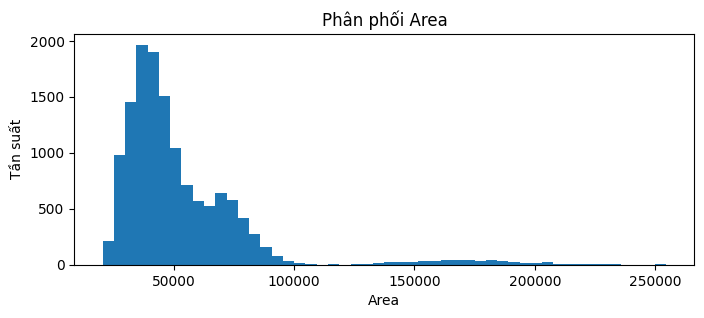

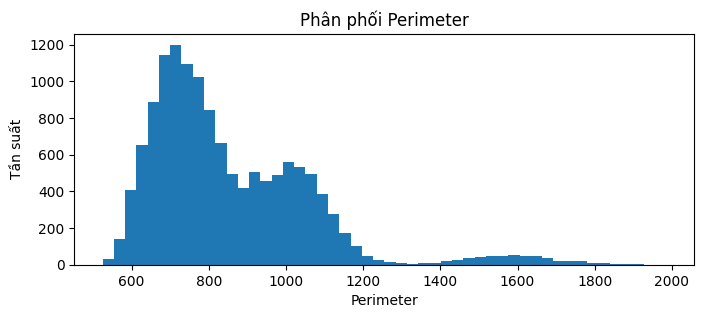

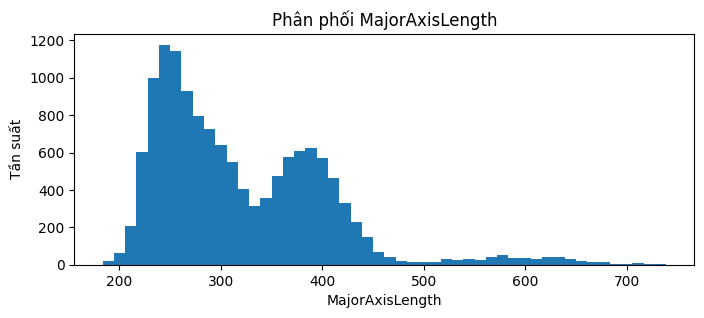

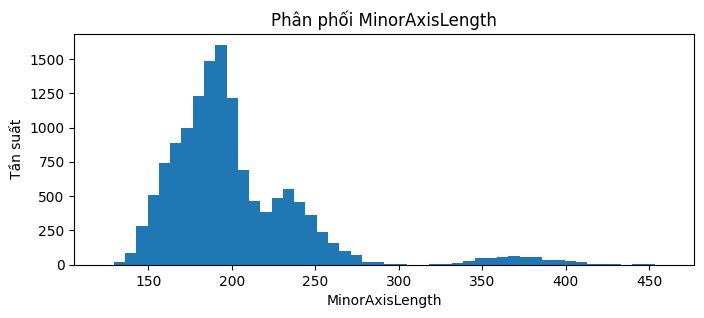

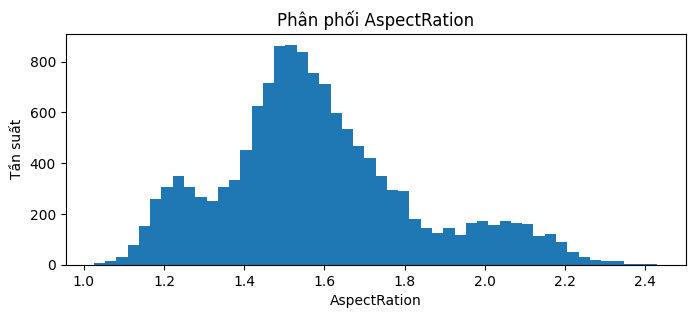

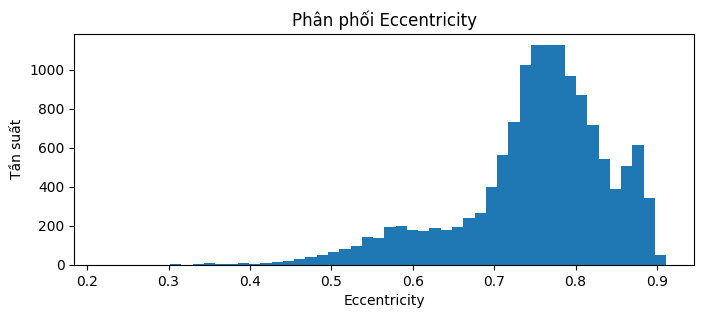

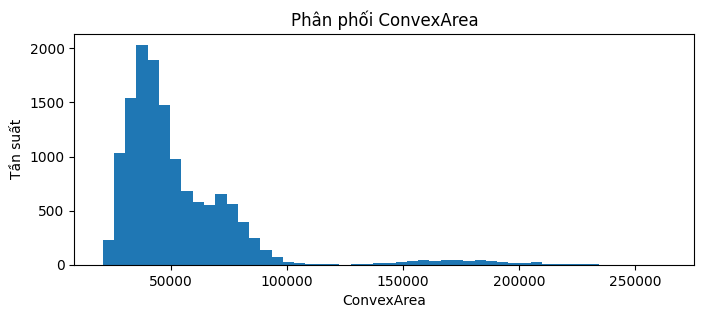

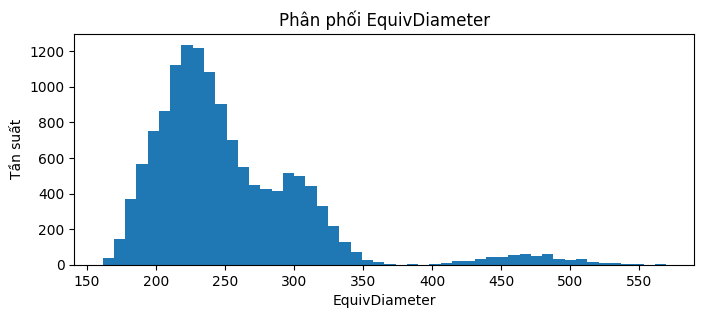

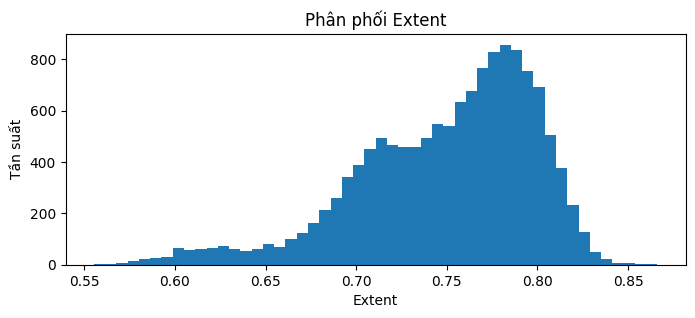

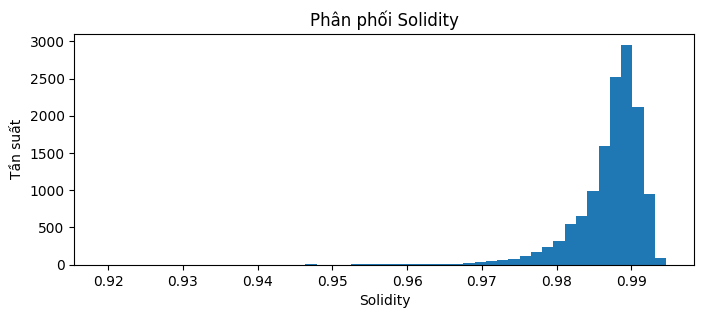

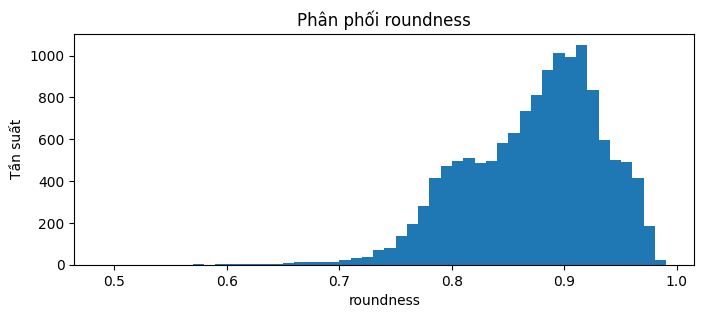

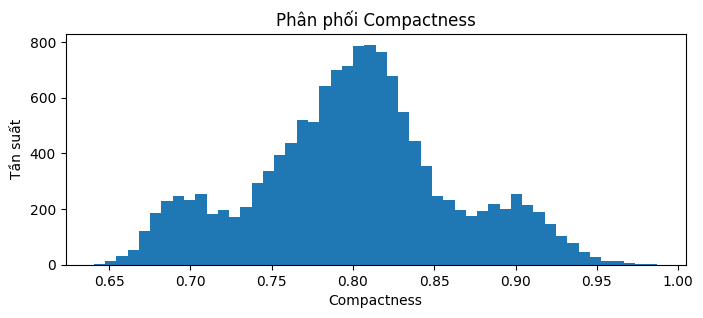

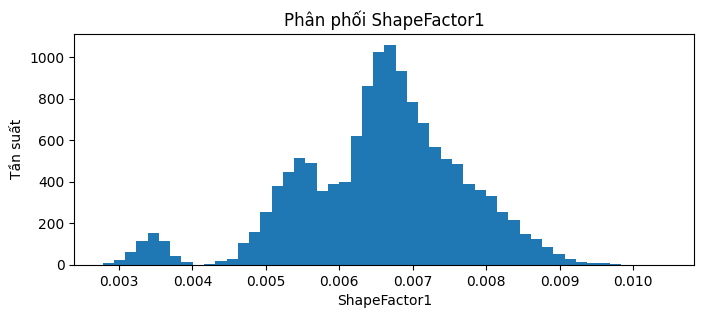

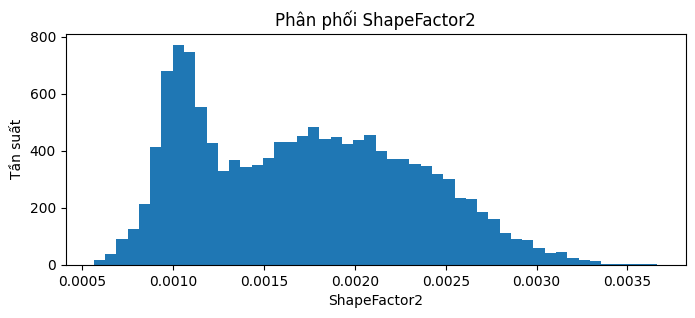

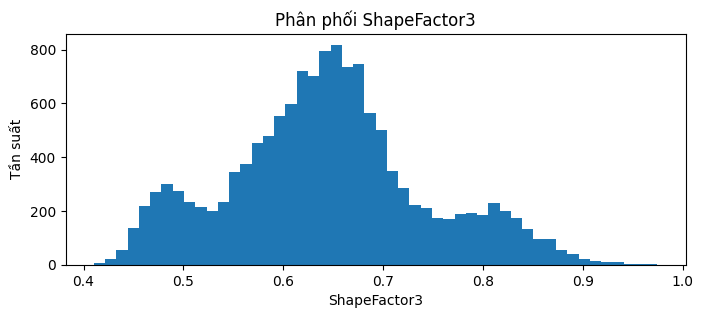

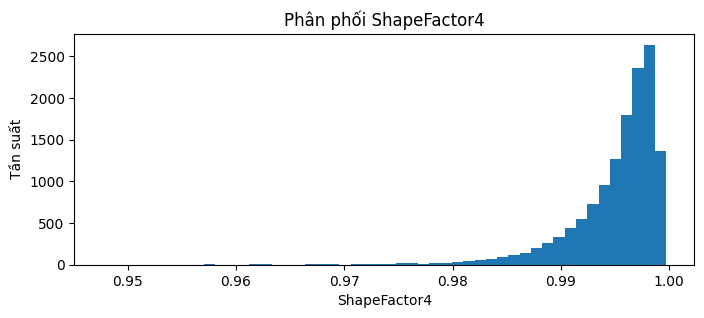

In [168]:
for col in DATA.columns:
    if col not in ['Class', 'Class_encoded']:
        plt.figure(figsize=(8,3))
        plt.hist(DATA[col], bins=50)
        plt.xlabel(col)
        plt.ylabel("Tần suất")
        plt.title(f"Phân phối {col}")
        plt.show()

# Trực quan hóa mối tương quan giữa các thuộc tính số

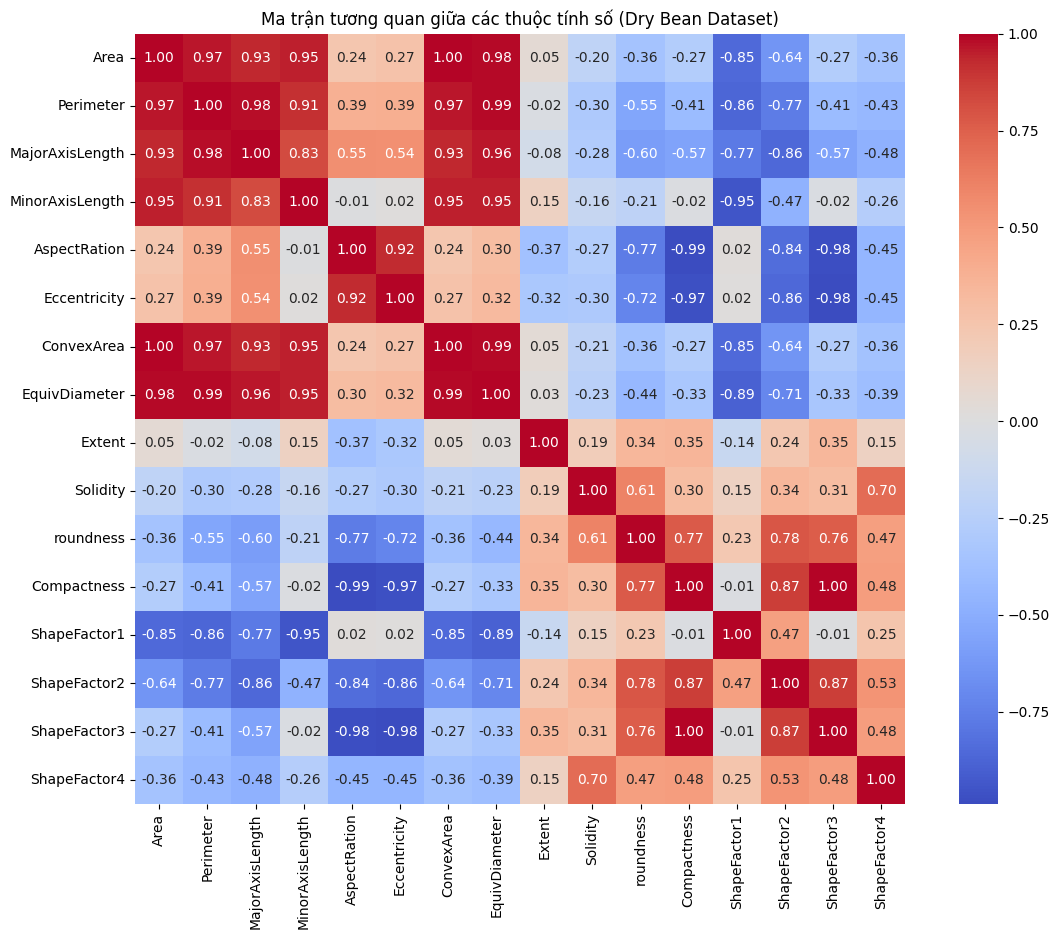

In [169]:
plt.figure(figsize=(14, 10))
corr = DATA.drop(columns=['Class', 'Class_encoded'], errors='ignore').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Ma trận tương quan giữa các thuộc tính số (Dry Bean Dataset)')
plt.show()

# 2. TIỀN XỬ LÝ DỮ LIỆU

# Kiểm tra giá trị thiếu

In [170]:
print(DATA.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Encode nhãn (Class) thành số

In [171]:
le = LabelEncoder()
DATA['Class_encoded'] = le.fit_transform(DATA['Class'])
print(le.classes_)

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


# Tách đặc trưng và nhãn

In [172]:
FEATURES = DATA.drop(columns=['Class', 'Class_encoded'])
LABELS = DATA['Class_encoded']

# Kiểm tra lại dữ liệu sau tiền xử lý

In [173]:
print(DATA.info())
print(DATA.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  Class_encode

# 3. CHIA TẬP HUẤN LUYỆN VÀ KIỂM TRA

- Chia dữ liệu thành các tập train/test với các tỷ lệ: 40/60, 60/40, 80/20, 90/10.
- Đảm bảo chia theo phân tầng (stratify) để giữ nguyên tỷ lệ nhãn.
- Trực quan hóa phân bố nhãn ở từng tập.

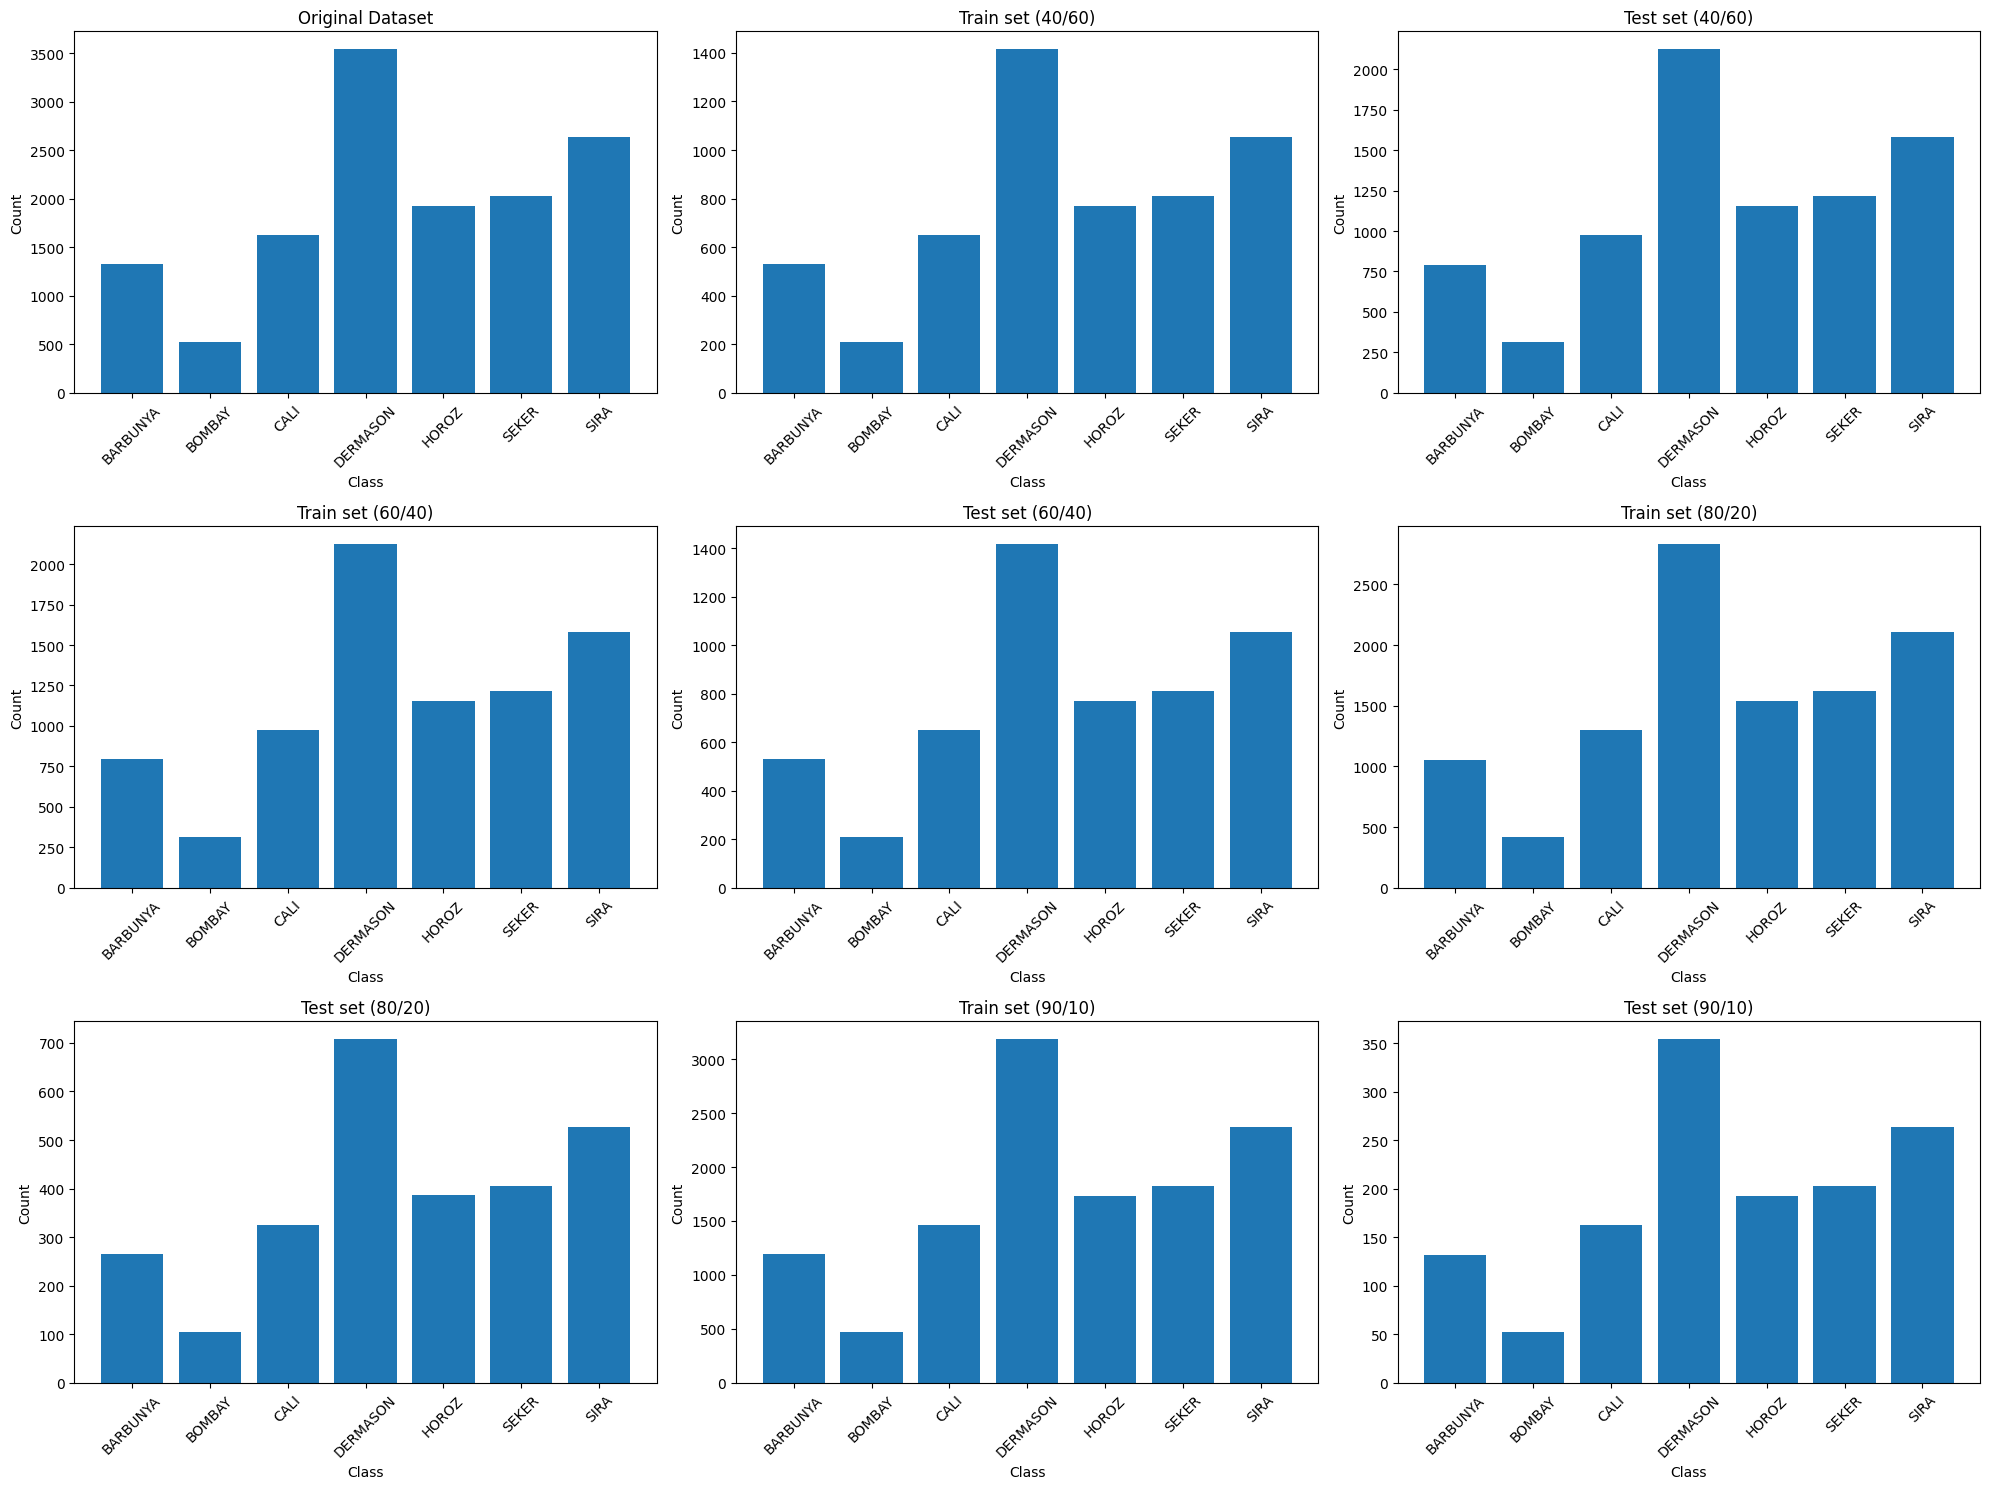

In [174]:
sets = [
    (LABELS, "Original Dataset"),
    (labels_train1, "Train set (40/60)"), (labels_test1, "Test set (40/60)"),
    (labels_train2, "Train set (60/40)"), (labels_test2, "Test set (60/40)"),
    (labels_train3, "Train set (80/20)"), (labels_test3, "Test set (80/20)"),
    (labels_train4, "Train set (90/10)"), (labels_test4, "Test set (90/10)")
]

plt.figure(figsize=(20, 15))
for i, (labels, title) in enumerate(sets, 1):
    plt.subplot(3, 3, i)
    value_counts = labels.value_counts().sort_index()
    class_names = le.inverse_transform(value_counts.index)
    plt.bar(class_names, value_counts)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nhận xét về phân bố nhãn qua các biểu đồ:

- Tất cả các biểu đồ tròn (pie chart) cho tập dữ liệu gốc, các tập train và test ở từng tỷ lệ (40/60, 60/40, 80/20, 90/10) đều cho thấy tỷ lệ các lớp (các loại đậu) gần như không thay đổi.
- Phân bố nhãn giữa các tập train và test ở mỗi tỷ lệ đều rất giống với phân bố của tập dữ liệu gốc. Điều này chứng tỏ việc chia dữ liệu đã được thực hiện đúng với tham số stratify, đảm bảo mỗi lớp đều được đại diện công bằng trong cả tập huấn luyện và kiểm tra.
- Không có lớp nào bị thiếu hoặc bị lệch tỷ lệ trong bất kỳ tập con nào, kể cả với các tỷ lệ chia nhỏ như 90/10.
- Việc trực quan hóa này xác nhận rằng các tập dữ liệu đã được chuẩn bị hợp lý, đảm bảo tính khách quan và đại diện cho toàn bộ dữ liệu khi huấn luyện và đánh giá mô hình.

# 4. HUẤN LUYỆN MÔ HÌNH CÂY QUYẾT ĐỊNH

- Sử dụng DecisionTreeClassifier với tiêu chí entropy (information gain).
- Huấn luyện trên từng tập train đã chia.

In [175]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=3 , random_state= 42)
clf1.fit(features_train1, labels_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [176]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf2.fit(features_train2, labels_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [177]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf3.fit(features_train3, labels_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [178]:
clf4 = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state= 42)
clf4.fit(features_train4, labels_train4)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Đánh giá mô hình trên từng tập test


=== Đánh giá Decision Tree (Test set 40/60) ===
Confusion Matrix:


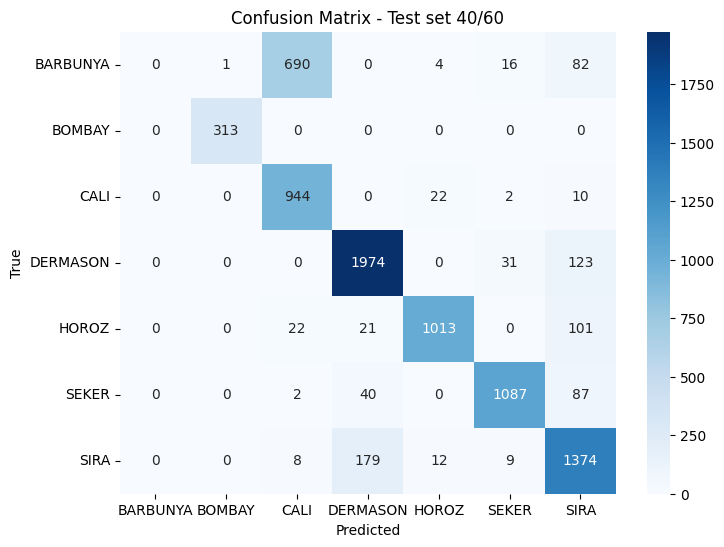

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       793
      BOMBAY       1.00      1.00      1.00       313
        CALI       0.57      0.97      0.71       978
    DERMASON       0.89      0.93      0.91      2128
       HOROZ       0.96      0.88      0.92      1157
       SEKER       0.95      0.89      0.92      1216
        SIRA       0.77      0.87      0.82      1582

    accuracy                           0.82      8167
   macro avg       0.73      0.79      0.75      8167
weighted avg       0.77      0.82      0.79      8167

Accuracy: 0.8210

=== Đánh giá Decision Tree (Test set 60/40) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

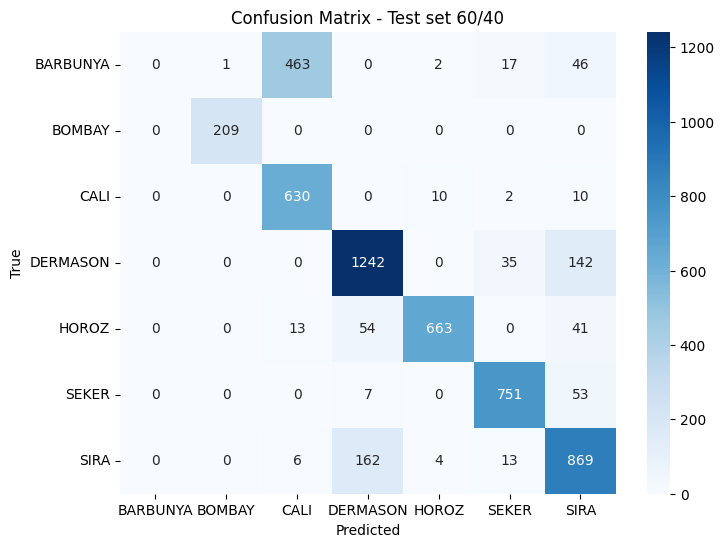

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       529
      BOMBAY       1.00      1.00      1.00       209
        CALI       0.57      0.97      0.71       652
    DERMASON       0.85      0.88      0.86      1419
       HOROZ       0.98      0.86      0.91       771
       SEKER       0.92      0.93      0.92       811
        SIRA       0.75      0.82      0.78      1054

    accuracy                           0.80      5445
   macro avg       0.72      0.78      0.74      5445
weighted avg       0.75      0.80      0.77      5445

Accuracy: 0.8015

=== Đánh giá Decision Tree (Test set 80/20) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

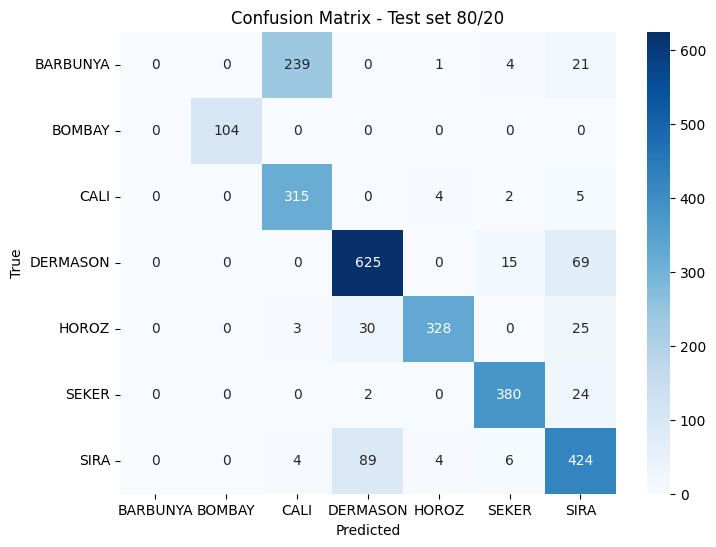

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.56      0.97      0.71       326
    DERMASON       0.84      0.88      0.86       709
       HOROZ       0.97      0.85      0.91       386
       SEKER       0.93      0.94      0.93       406
        SIRA       0.75      0.80      0.77       527

    accuracy                           0.80      2723
   macro avg       0.72      0.78      0.74      2723
weighted avg       0.75      0.80      0.76      2723

Accuracy: 0.7991

=== Đánh giá Decision Tree (Test set 90/10) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

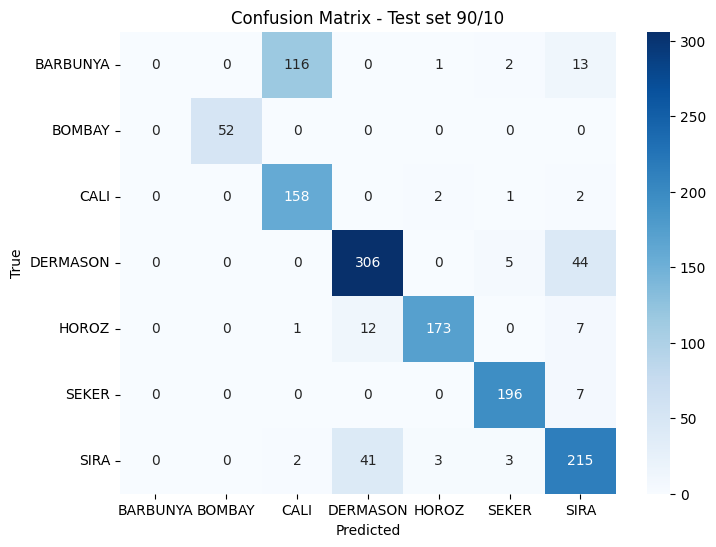

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       132
      BOMBAY       1.00      1.00      1.00        52
        CALI       0.57      0.97      0.72       163
    DERMASON       0.85      0.86      0.86       355
       HOROZ       0.97      0.90      0.93       193
       SEKER       0.95      0.97      0.96       203
        SIRA       0.75      0.81      0.78       264

    accuracy                           0.81      1362
   macro avg       0.73      0.79      0.75      1362
weighted avg       0.75      0.81      0.77      1362

Accuracy: 0.8076


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [179]:
for i, (clf, X_test, y_test, ratio) in enumerate([
    (clf1, features_test1, labels_test1, "40/60"),
    (clf2, features_test2, labels_test2, "60/40"),
    (clf3, features_test3, labels_test3, "80/20"),
    (clf4, features_test4, labels_test4, "90/10"),
], 1):
    y_pred = clf.predict(X_test)
    print(f"\n=== Đánh giá Decision Tree (Test set {ratio}) ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Test set {ratio}')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# 5. Trực quan hóa cây quyết định
Sử dụng Graphviz để trực quan hóa cấu trúc cây quyết định cho từng mô hình.

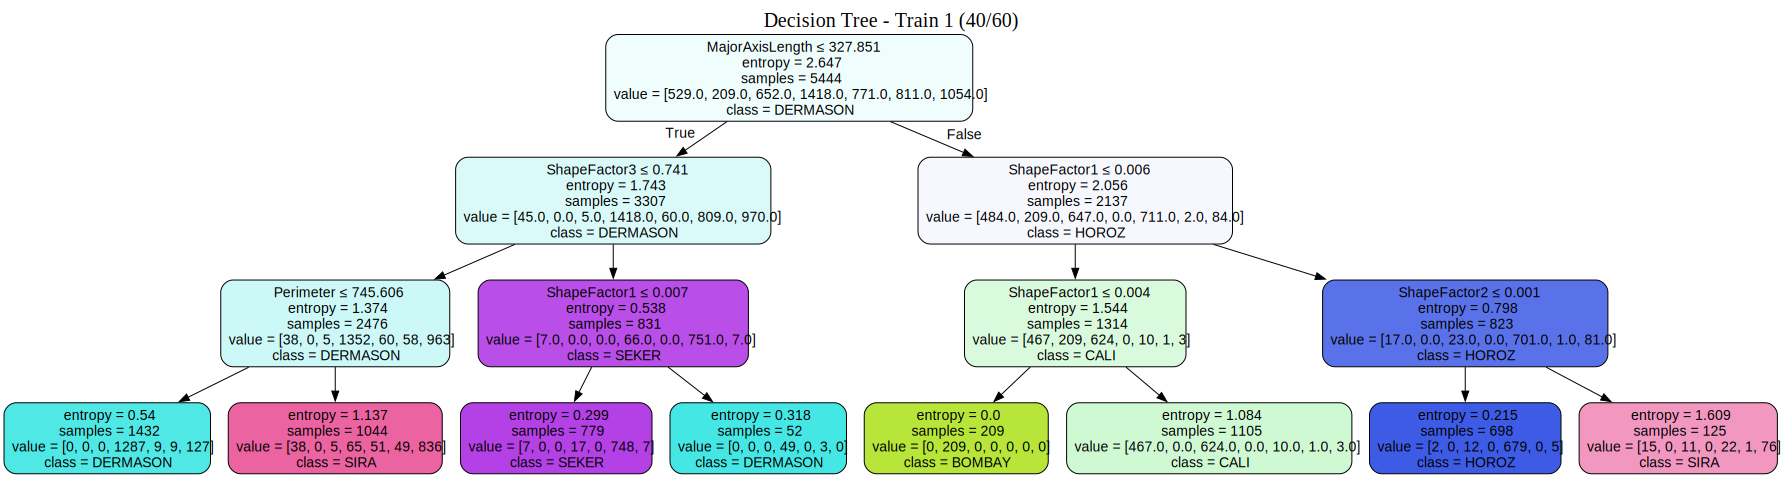

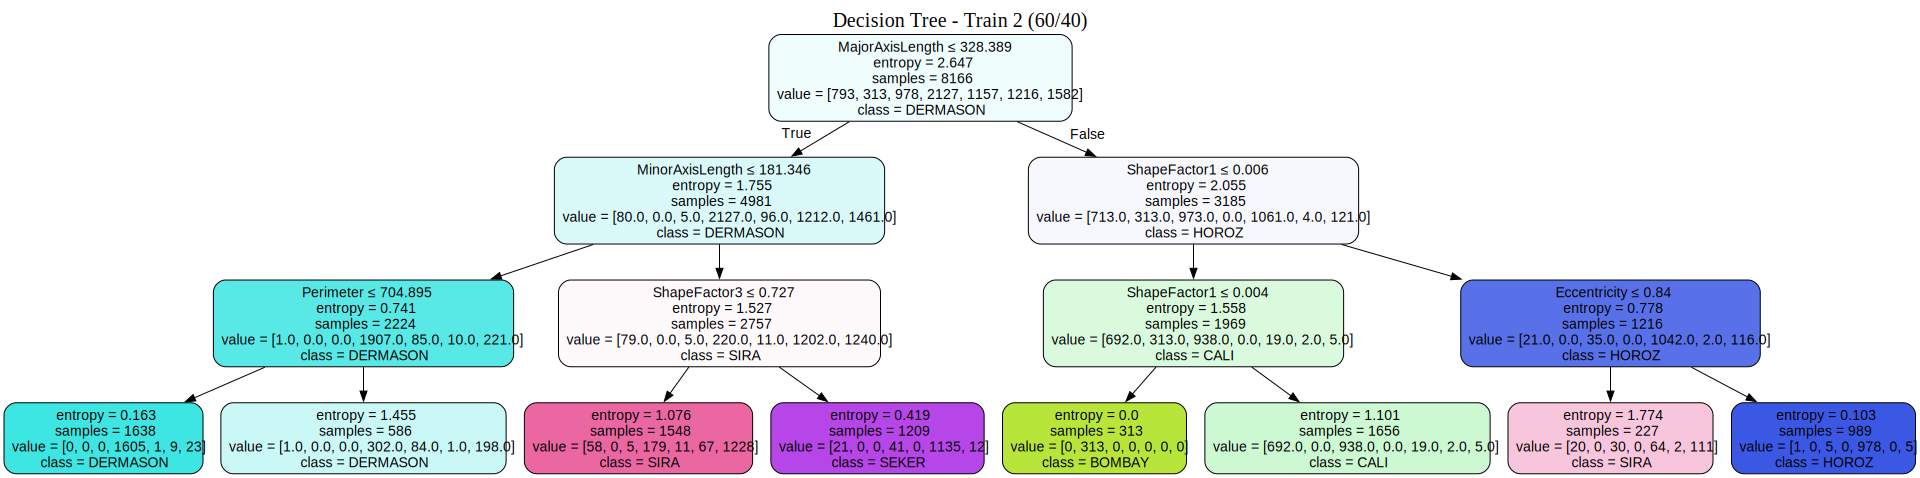

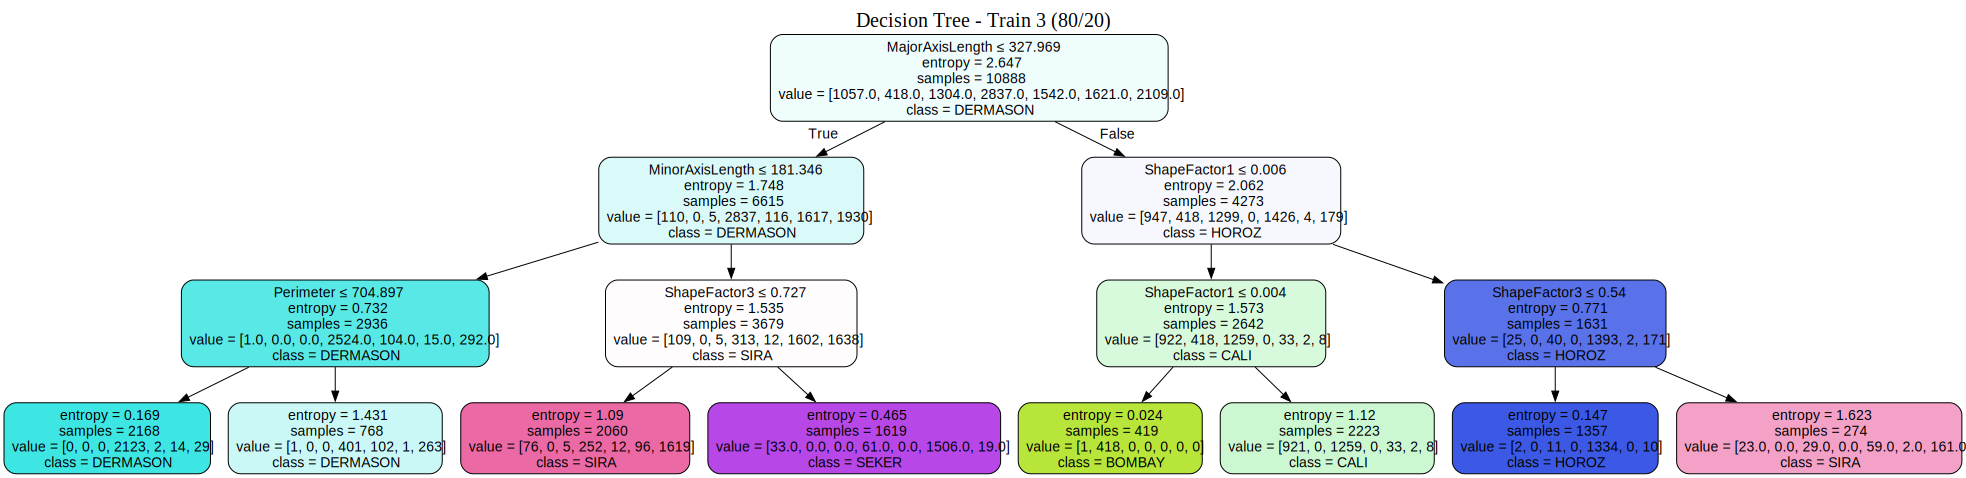

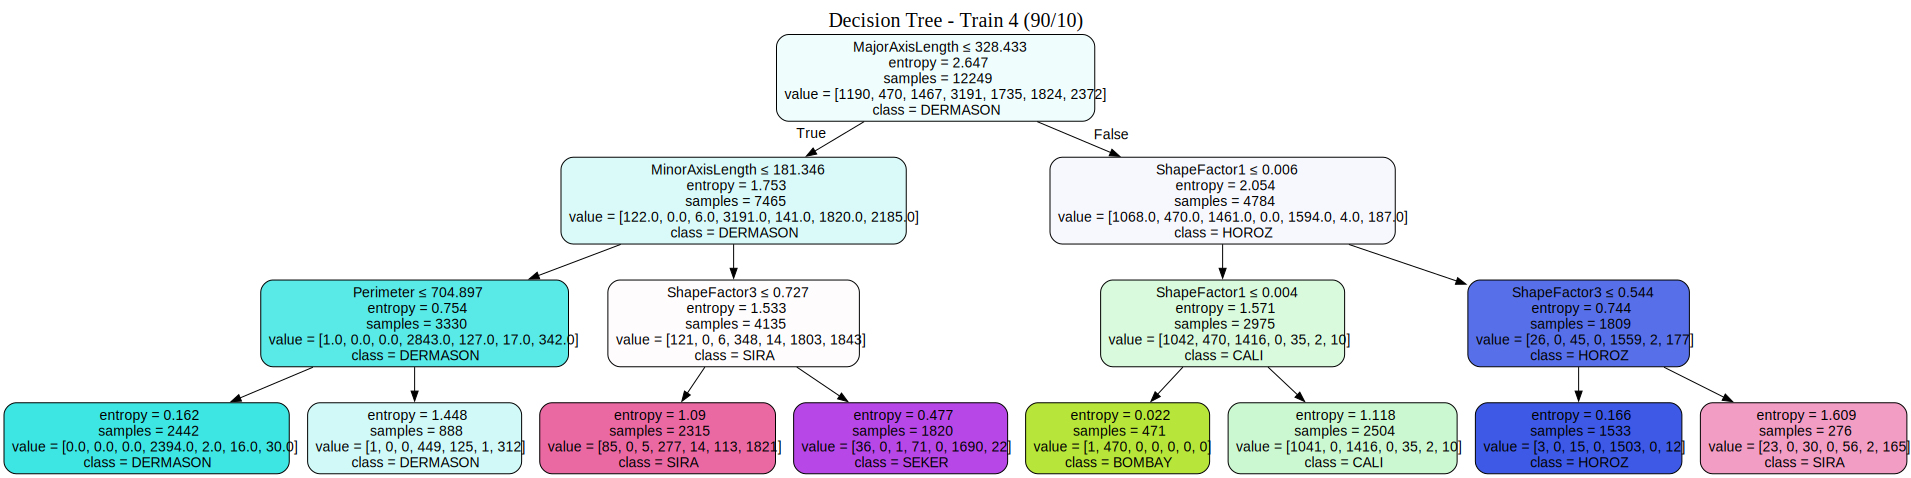

In [180]:
for i, (clf, features_train, title) in enumerate([
    (clf1, features_train1, "Decision Tree - Train 1 (40/60)"),
    (clf2, features_train2, "Decision Tree - Train 2 (60/40)"),
    (clf3, features_train3, "Decision Tree - Train 3 (80/20)"),
    (clf4, features_train4, "Decision Tree - Train 4 (90/10)"),
], 1):
    dot_data = export_graphviz(
        clf,
        feature_names=features_train.columns,
        class_names=le.classes_, 
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="{title}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    display(graph)

# 6. Đánh giá cây quyết định

Đánh giá hiệu suất từng mô hình trên tập kiểm tra bằng confusion_matrix và classification_report. Giải thích ý nghĩa các chỉ số và nhận xét về hiệu suất mô hình.


=== Đánh giá Decision Tree (Test set 40/60) ===
Confusion Matrix:


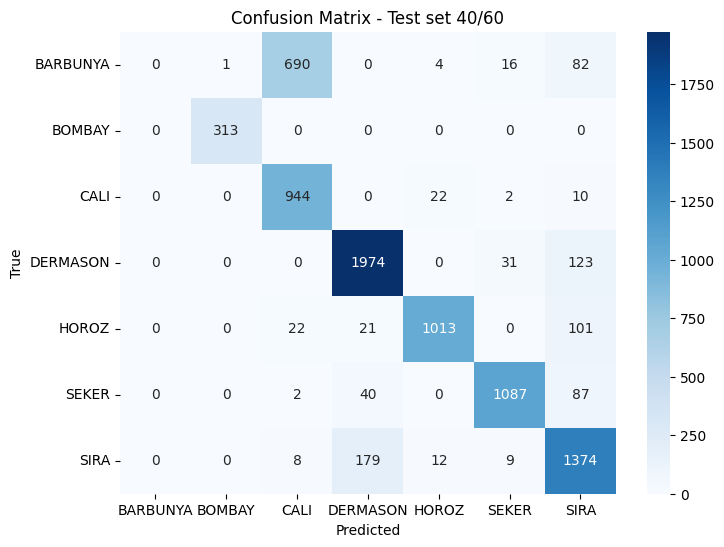

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       793
      BOMBAY       1.00      1.00      1.00       313
        CALI       0.57      0.97      0.71       978
    DERMASON       0.89      0.93      0.91      2128
       HOROZ       0.96      0.88      0.92      1157
       SEKER       0.95      0.89      0.92      1216
        SIRA       0.77      0.87      0.82      1582

    accuracy                           0.82      8167
   macro avg       0.73      0.79      0.75      8167
weighted avg       0.77      0.82      0.79      8167

Accuracy: 0.8210

=== Đánh giá Decision Tree (Test set 60/40) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

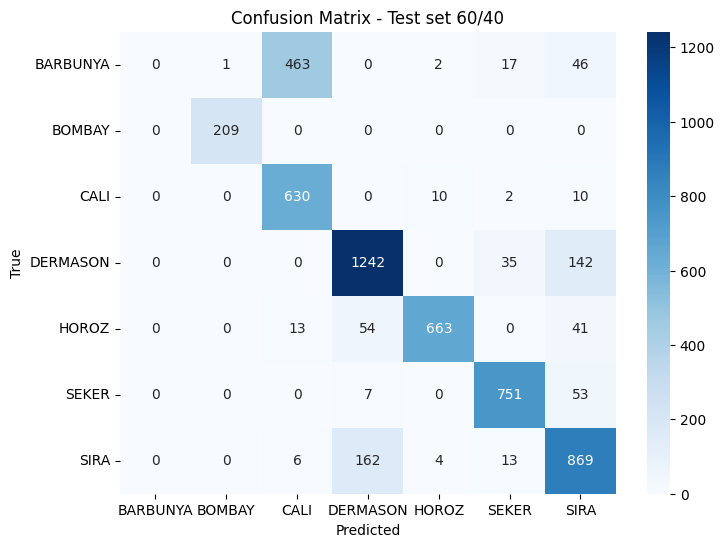

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       529
      BOMBAY       1.00      1.00      1.00       209
        CALI       0.57      0.97      0.71       652
    DERMASON       0.85      0.88      0.86      1419
       HOROZ       0.98      0.86      0.91       771
       SEKER       0.92      0.93      0.92       811
        SIRA       0.75      0.82      0.78      1054

    accuracy                           0.80      5445
   macro avg       0.72      0.78      0.74      5445
weighted avg       0.75      0.80      0.77      5445

Accuracy: 0.8015

=== Đánh giá Decision Tree (Test set 80/20) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

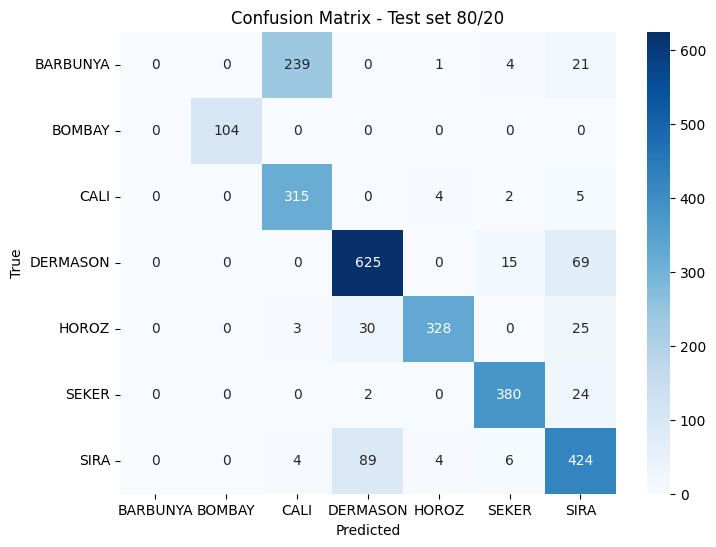

Classification Report:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.56      0.97      0.71       326
    DERMASON       0.84      0.88      0.86       709
       HOROZ       0.97      0.85      0.91       386
       SEKER       0.93      0.94      0.93       406
        SIRA       0.75      0.80      0.77       527

    accuracy                           0.80      2723
   macro avg       0.72      0.78      0.74      2723
weighted avg       0.75      0.80      0.76      2723

Accuracy: 0.7991

=== Đánh giá Decision Tree (Test set 90/10) ===
Confusion Matrix:


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


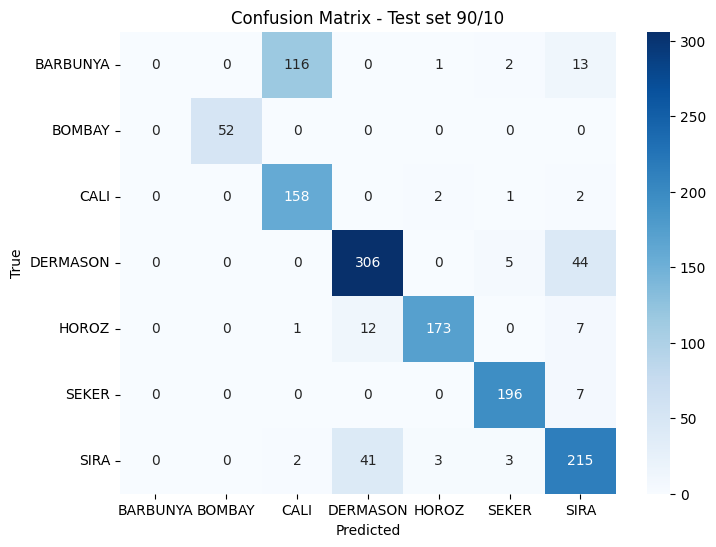

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       132
      BOMBAY       1.00      1.00      1.00        52
        CALI       0.57      0.97      0.72       163
    DERMASON       0.85      0.86      0.86       355
       HOROZ       0.97      0.90      0.93       193
       SEKER       0.95      0.97      0.96       203
        SIRA       0.75      0.81      0.78       264

    accuracy                           0.81      1362
   macro avg       0.73      0.79      0.75      1362
weighted avg       0.75      0.81      0.77      1362

Accuracy: 0.8076


c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [181]:

test_sets = [
    (clf1, features_test1, labels_test1, "40/60"),
    (clf2, features_test2, labels_test2, "60/40"),
    (clf3, features_test3, labels_test3, "80/20"),
    (clf4, features_test4, labels_test4, "90/10"),
]

for clf, X_test, y_test, ratio in test_sets:
    y_pred = clf.predict(X_test)
    print(f"\n=== Đánh giá Decision Tree (Test set {ratio}) ===")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Test set {ratio}')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

## Ý nghĩa các chỉ số đánh giá

- **Confusion Matrix (Ma trận nhầm lẫn):** Cho biết số lượng mẫu của từng lớp thực tế được dự đoán đúng hoặc nhầm sang các lớp khác. Mỗi hàng là lớp thực tế, mỗi cột là lớp dự đoán. Số lớn nhất trên đường chéo chính là số lượng dự đoán đúng cho từng lớp.
- **Classification Report:** 
  - **Precision:** Tỷ lệ dự đoán đúng trên tổng số dự đoán cho mỗi lớp (dự đoán đúng / tất cả dự đoán là lớp đó).
  - **Recall:** Tỷ lệ dự đoán đúng trên tổng số mẫu thực tế của mỗi lớp (dự đoán đúng / tất cả mẫu thực tế của lớp đó).
  - **F1-score:** Trung bình điều hòa giữa precision và recall, phản ánh cân bằng giữa hai chỉ số trên.
  - **Support:** Số lượng mẫu thực tế của từng lớp trong tập kiểm tra.
- **Accuracy:** Tỷ lệ tổng thể các dự đoán đúng trên toàn bộ tập kiểm tra.

## Nhận xét dựa trên kết quả

- **Độ chính xác tổng thể (accuracy)** của các mô hình dao động quanh mức 0.80–0.82 với max_depth=3, cho thấy mô hình có khả năng phân loại khá tốt trên tập kiểm tra với các tỷ lệ chia khác nhau.
- **Các lớp như BOMBAY, DERMASON, HOROZ, SEKER** có precision, recall và f1-score cao, chứng tỏ mô hình nhận diện tốt các loại đậu này.
- **Lớp BARBUNYA** luôn có precision và recall bằng 0, nghĩa là mô hình không dự đoán đúng được mẫu nào thuộc lớp này. Điều này có thể do số lượng mẫu ít, đặc trưng chưa đủ phân biệt, hoặc bị lấn át bởi các lớp khác khi max_depth nhỏ.
- **Lớp CALI và SIRA** có recall cao nhưng precision thấp, cho thấy mô hình dự đoán nhiều mẫu là các lớp này, nhưng cũng có nhiều dự đoán nhầm.
- **Macro avg** và **weighted avg** cho thấy sự cân bằng giữa các lớp chưa thực sự tốt, do một số lớp bị bỏ sót hoàn toàn.
- **F1-score** tổng thể ở mức khá, nhưng vẫn còn dư địa cải thiện, đặc biệt với các lớp bị bỏ sót.

## Kết luận

- Với max_depth=3, mô hình Decision Tree cho kết quả khá ổn định và tổng thể tốt trên các tập kiểm tra, nhưng chưa nhận diện được tất cả các lớp, đặc biệt là BARBUNYA.
- Để cải thiện, có thể tăng max_depth, bổ sung đặc trưng hoặc thử các mô hình phức tạp hơn để tăng khả năng phân biệt các lớp khó.
- Việc phân tích confusion matrix và classification report giúp phát hiện các lớp bị bỏ sót hoặc dự đoán nhầm lẫn, từ đó có hướng điều chỉnh mô hình phù hợp hơn.

# Đánh giá mô hình bằng Cross-validation

In [182]:
scores = cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42),
                         FEATURES, LABELS, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.54168197 0.83027186 0.87729611 0.61866275 0.3901543 ]
Mean accuracy: 0.6516133958876991


Kết quả cross-validation:

- **Cross-validation scores:** [0.5417, 0.8303, 0.8773, 0.6187, 0.3902]
- **Mean accuracy:** 0.65

**Nhận xét:**

- Độ chính xác của mô hình Decision Tree dao động khá lớn giữa các lần chia dữ liệu, từ khoảng 0.39 đến 0.88, cho thấy mô hình có thể bị ảnh hưởng bởi cách chia tập dữ liệu, đặc biệt với một số fold có kết quả thấp.
- Giá trị trung bình accuracy đạt khoảng 0.65, cao hơn so với khi max_depth=2, cho thấy mô hình với max_depth=3 đã học tốt hơn và giảm hiện tượng underfitting.
- Tuy nhiên, sự dao động lớn giữa các fold cho thấy mô hình vẫn chưa thực sự ổn định, có thể do dữ liệu chưa đủ đồng đều hoặc một số lớp khó phân biệt.
- Độ chính xác này ở mức trung bình khá, nhưng vẫn còn dư địa để cải thiện thêm bằng cách tăng độ sâu cây, bổ sung đặc trưng hoặc thử các mô hình phức tạp hơn.

**Kết luận:**  
Cross-validation cho thấy mô hình Decision Tree với max_depth=3 đã cải thiện hiệu quả dự đoán so với max_depth=2, nhưng vẫn cần tối ưu thêm để đạt hiệu suất ổn định và cao hơn trên toàn bộ dữ liệu Dry Bean.

# 7. PHÂN TÍCH ẢNH HƯỞNG ĐỘ SÂU CỦA CÂY

- Sử dụng tập chia 80/20.
- Thử nghiệm các giá trị max_depth khác nhau.
- Trực quan hóa cây và so sánh độ chính xác.

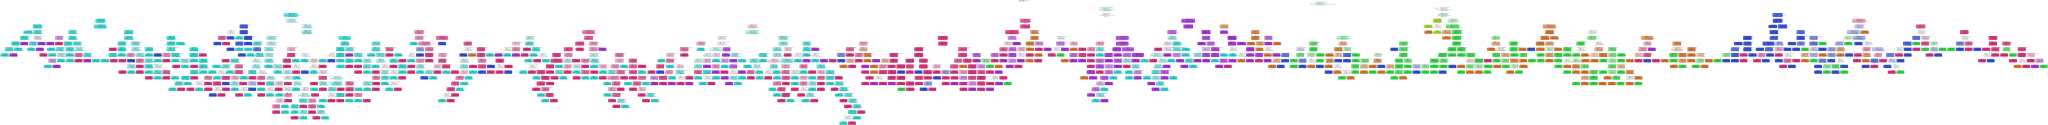

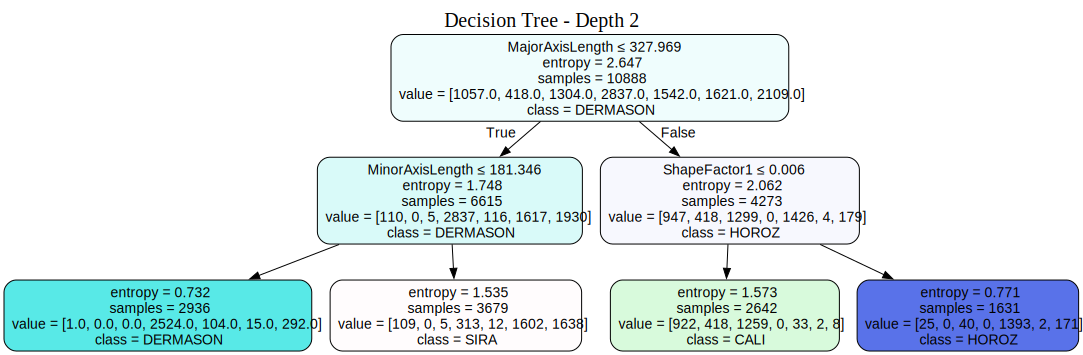

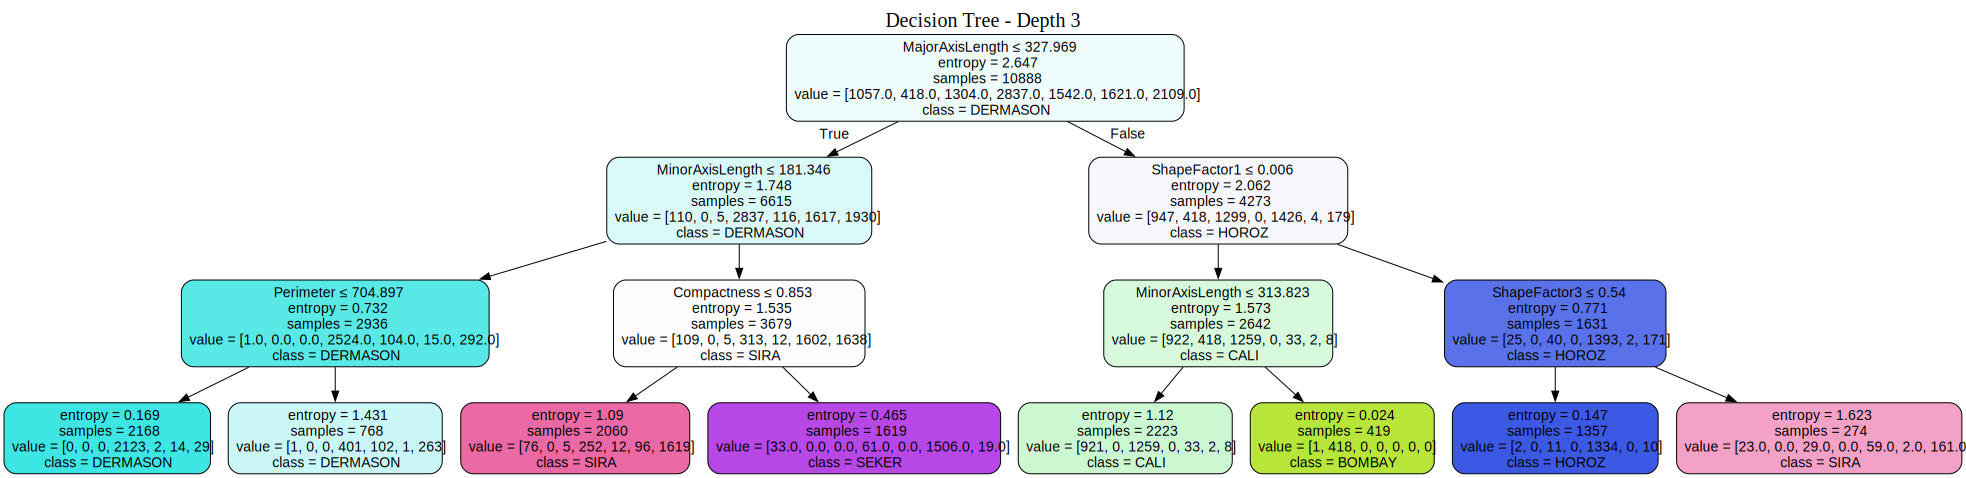

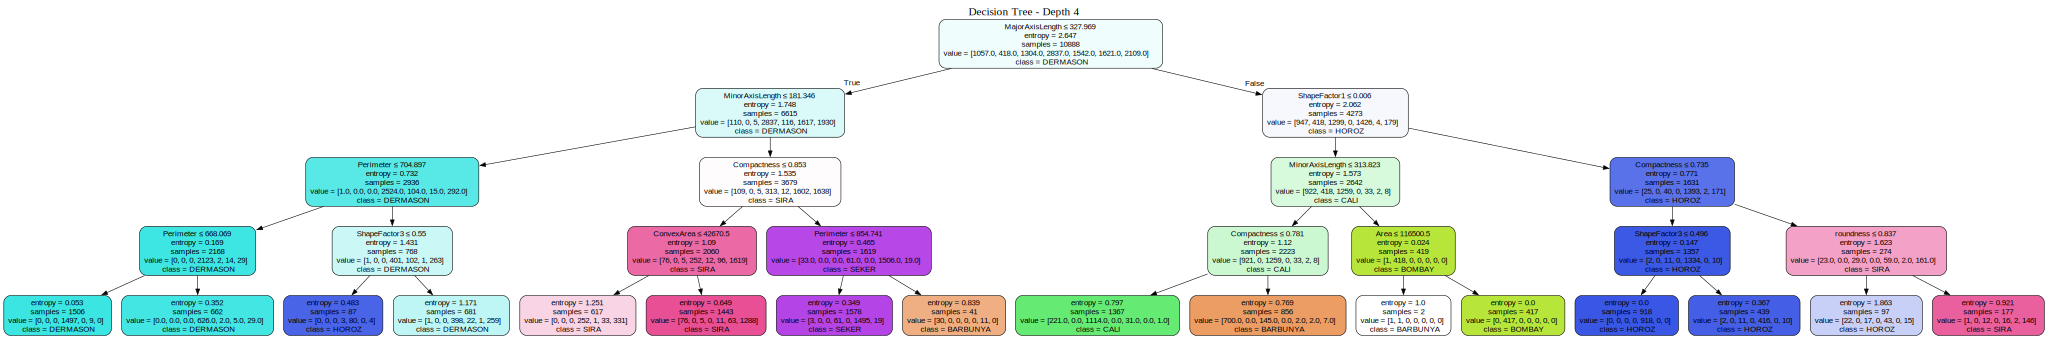

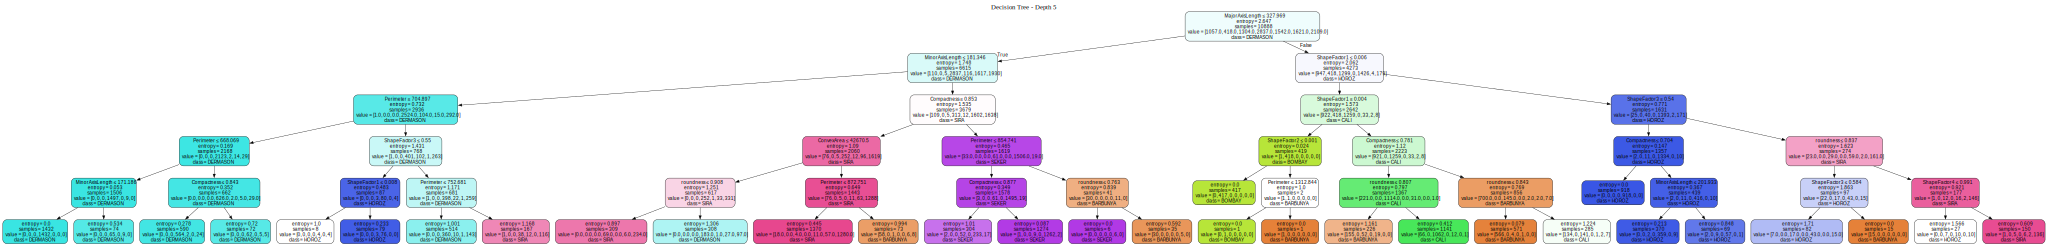

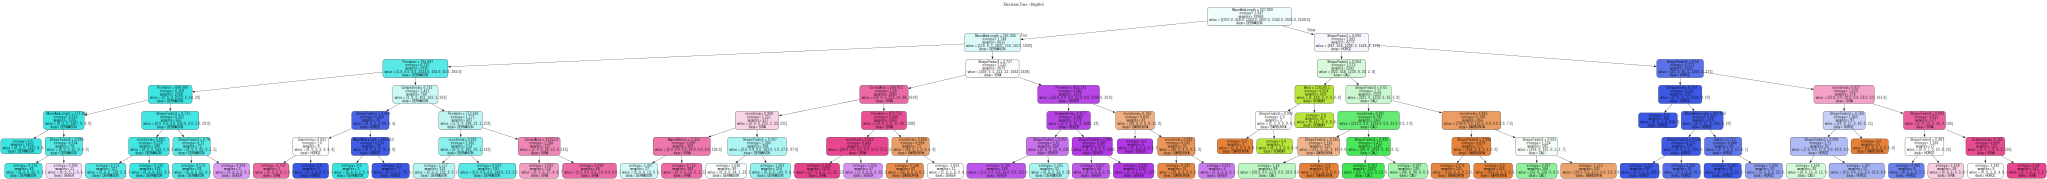

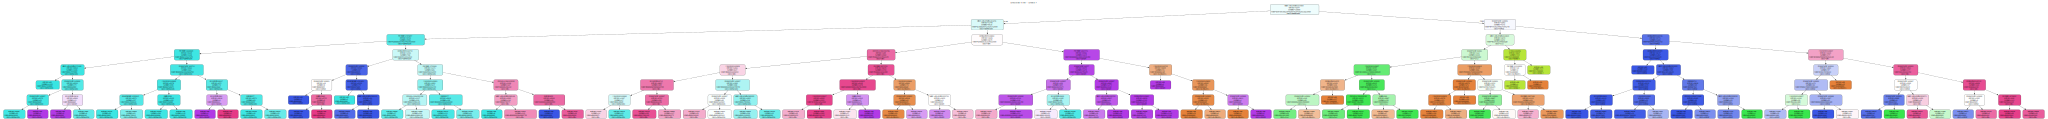

Max Depth | Test Accuracy
-------------------------
     None | 0.8961
        2 | 0.6170
        3 | 0.7991
        4 | 0.8682
        5 | 0.8873
        6 | 0.8979
        7 | 0.9056


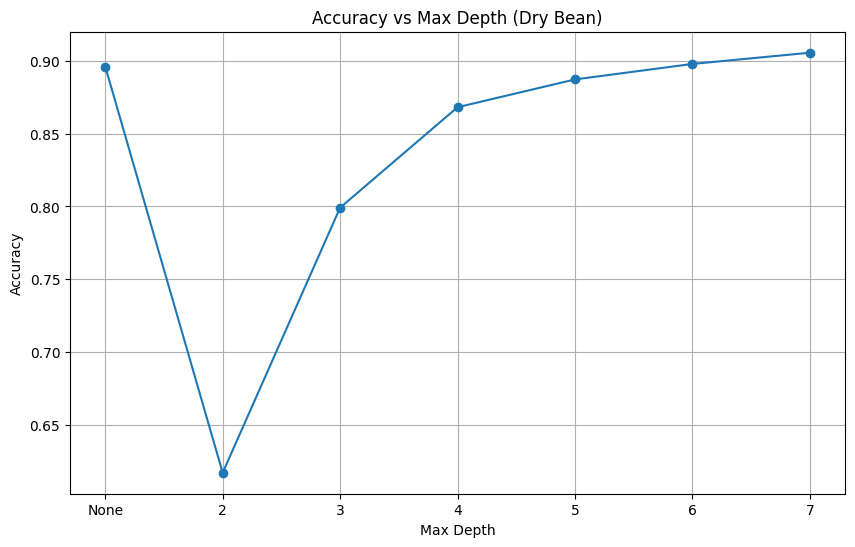

In [183]:

max_depth_values = [None,2, 3, 4, 5, 6, 7]
accuracy_results = {}

for depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    clf.fit(features_train3, labels_train3)
    y_pred = clf.predict(features_test3)
    acc = accuracy_score(labels_test3, y_pred)
    accuracy_results[depth] = acc

    dot_data = export_graphviz(
        clf,
        feature_names=features_train3.columns,
        class_names=le.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Depth {depth}"; labelloc=top; fontsize=20;'
    )
    graph = graphviz.Source(dot_data)
    display(graph)

print("Max Depth | Test Accuracy")
print("-------------------------")
for depth, acc in accuracy_results.items():
    depth_str = "None" if depth is None else str(depth)
    print(f"{depth_str:>9} | {acc:.4f}")

x_values = [1 if d is None else d for d in max_depth_values]
y_values = list(accuracy_results.values())

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.title('Accuracy vs Max Depth (Dry Bean)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.xticks(x_values, labels=[str(d) if d is not None else 'None' for d in max_depth_values])
plt.show()

### Nhận xét

- Độ chính xác kiểm tra giảm mạnh khi max_depth = 2, sau đó tăng dần khi tăng độ sâu cây từ 3 trở lên.
- Độ chính xác tiếp tục tăng khi tăng max_depth từ 3 đến 7, đạt giá trị cao nhất ở độ sâu 7 (**0.9055**).
- Khi max_depth=None (không giới hạn), độ chính xác vẫn rất cao (**0.8961**), nhưng không vượt qua độ sâu 7, cho thấy cây sâu hơn không còn cải thiện đáng kể.
- Điều này cho thấy với dữ liệu Dry Bean, cây quyết định càng sâu càng học tốt hơn (trong phạm vi này), nhưng cần chú ý nguy cơ overfitting nếu tăng quá lớn.
- **Độ sâu tối ưu cho mô hình này là từ 5 đến 7**, trong đó độ sâu 7 cho kết quả tốt nhất trên tập kiểm tra.
- Việc lựa chọn độ sâu phù hợp giúp mô hình học tốt mà vẫn kiểm soát được độ phức tạp.

**Kết luận:**  
Nên chọn độ sâu cây quyết định từ 5 đến 7 để đạt hiệu quả dự đoán tốt nhất trên dữ liệu

# So sánh tiêu chí Gini và Entropy

In [184]:
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=42)
clf_gini.fit(features_train1, labels_train1)
y_pred_gini = clf_gini.predict(features_test1)
print("Accuracy (Gini):", accuracy_score(labels_test1, y_pred_gini))


Accuracy (Gini): 0.8991061589322885


- Độ chính xác khi sử dụng tiêu chí Gini đạt **0.8991**, rất gần với độ chính xác khi dùng Entropy (**0.9055** với max_depth=7).
- Điều này cho thấy với dữ liệu Dry Bean, việc chọn tiêu chí Gini hay Entropy không ảnh hưởng nhiều đến hiệu quả mô hình. Có thể ưu tiên Gini nếu muốn tốc độ huấn luyện nhanh hơn, còn Entropy nếu muốn tối ưu hóa phân chia thông tin.


# Tối ưu tham số với GridSearchCV

In [185]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, None],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(features_train3, labels_train3)
print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'criterion': 'entropy', 'max_depth': 7}
Best score: 0.9071453247132872


- GridSearchCV đã tìm ra bộ tham số tốt nhất cho Decision Tree là **max_depth=7** và **criterion='entropy'**.
- Độ chính xác trung bình tốt nhất trên tập validation là **0.9071**, cao hơn so với các giá trị max_depth nhỏ hơn.
- Việc tối ưu tham số giúp mô hình đạt hiệu suất dự đoán cao nhất, đồng thời kiểm soát được độ phức tạp để tránh overfitting.


# Phân tích tầm quan trọng của các đặc trưng 

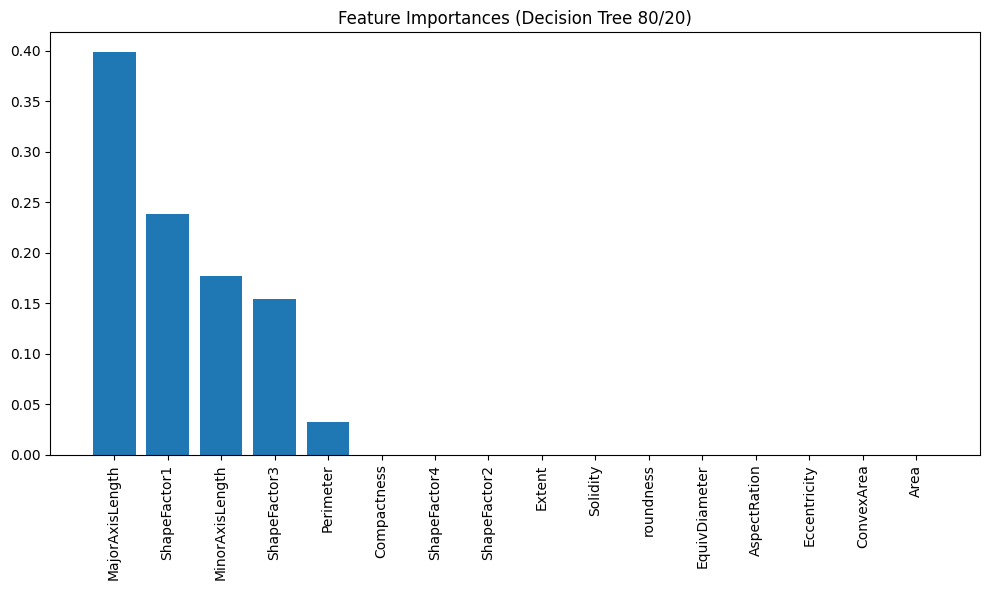

MajorAxisLength: 0.3983
ShapeFactor1: 0.2382
MinorAxisLength: 0.1775
ShapeFactor3: 0.1538
Perimeter: 0.0323
Compactness: 0.0000
ShapeFactor4: 0.0000
ShapeFactor2: 0.0000
Extent: 0.0000
Solidity: 0.0000
roundness: 0.0000
EquivDiameter: 0.0000
AspectRation: 0.0000
Eccentricity: 0.0000
ConvexArea: 0.0000
Area: 0.0000


In [186]:
importances = clf3.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Decision Tree 80/20)")
plt.bar(range(FEATURES.shape[1]), importances[indices])
plt.xticks(range(FEATURES.shape[1]), FEATURES.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

for f in range(FEATURES.shape[1]):
    print(f"{FEATURES.columns[indices[f]]}: {importances[indices[f]]:.4f}")

- Các đặc trưng quan trọng nhất trong việc phân loại Dry Bean là:
    - **MajorAxisLength** (0.3983)
    - **ShapeFactor1** (0.2382)
    - **MinorAxisLength** (0.1775)
    - **ShapeFactor3** (0.1538)
    - **Perimeter** (0.0323)
- Các đặc trưng còn lại có tầm quan trọng gần như bằng 0 trong mô hình cây quyết định với max_depth=3.
- Điều này cho thấy chiều dài trục chính, ShapeFactor1, chiều dài trục phụ, ShapeFactor3 và chu vi là những yếu tố then chốt giúp phân biệt các loại đậu trong bộ dữ liệu này.